In [407]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: MacOSX


In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

In [409]:
filename='data.csv'
raw=pd.read_csv(filename)

In [410]:
raw.shape

(30697, 25)

In [411]:
raw.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [412]:
kobe=raw[pd.notnull(raw['shot_made_flag'])]

In [413]:
raw.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [414]:
alpha=0.02
plt.figure(figsize=(10,10))
plt.subplot(121)
%matplotlib inline

In [415]:
kobe.shape

(25697, 25)

In [416]:
kobe[:5]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


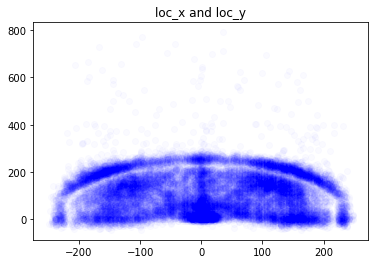

In [417]:
plt.scatter(kobe.loc_x,kobe.loc_y,color='blue',alpha=alpha)
plt.title("loc_x and loc_y")

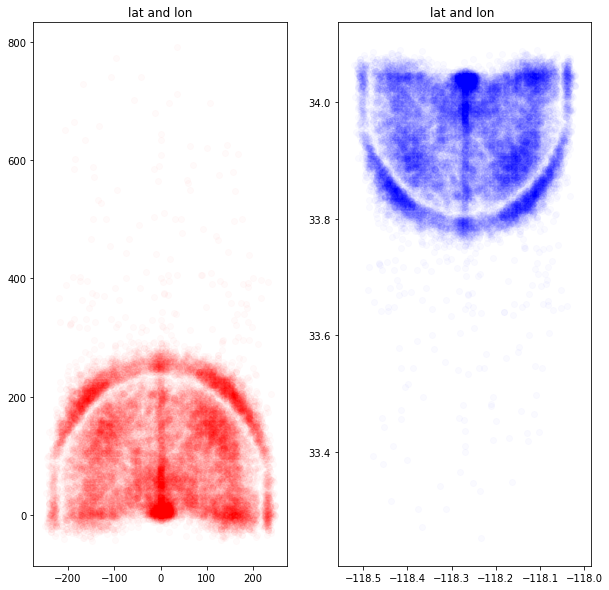

In [418]:
alpha=0.02
plt.figure(figsize=(10,10))

#loc_x and loc_y
plt.subplot(121)
plt.scatter(kobe.loc_x,kobe.loc_y,color='R',alpha=alpha)
plt.title("lat and lon")
# lat and lon 
plt.subplot(122)
plt.scatter(kobe.lon,kobe.lat,color='B',alpha=alpha)
plt.title("lat and lon ")

In [419]:
import numpy as np

In [420]:
raw['dist']=np.sqrt(raw['loc_x']**2+raw['loc_y']**2)

In [421]:
loc_x_zero = raw['loc_x'] == 0

raw['angle'] = np.array([0]*len(raw))
raw['angle'][~loc_x_zero] = np.arctan(raw['loc_y'][~loc_x_zero] / raw['loc_x'][~loc_x_zero])
raw['angle'][loc_x_zero] = np.pi / 2 

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [422]:
raw['remaining_time'] = raw['minutes_remaining'] * 60 + raw['seconds_remaining']

In [423]:
print(kobe.action_type.unique())
print(kobe.combined_shot_type.unique())
print(kobe.shot_type.unique())
print("1"*40)
print(kobe.shot_type.value_counts())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Jump Hook Shot' 'Running Finger Roll Shot'
 'Jump Bank Shot' 'Turnaround Finger Roll Shot' 'Hook Bank Shot'
 'Driving Hook Shot' 'Running Tip Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Turnaround Bank shot' 'Reverse Slam Dunk Shot'
 'Floating Jump shot' 'Putback Slam Dunk Shot' 'Running Bank shot'
 'Driving Bank shot' 'Driving Jump shot' 'Putback Layup Shot'
 'Putback Dun

In [424]:
kobe["season"].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [425]:
kobe.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [426]:
raw.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [427]:
raw['season1']=raw['season'].apply(lambda x:int(x.split('-')[1]))

In [428]:
raw.season1.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0])

In [429]:
raw.season=raw.season1

In [430]:
raw=raw.drop("season1",axis=1)

In [431]:
raw.season.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0])

In [432]:
kobe.team_id.unique()

array([1610612747])

In [433]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [434]:
kobe.team_name.unique()

array(['Los Angeles Lakers'], dtype=object)

In [435]:
test=pd.DataFrame({'matchup':kobe.matchup,'opponent':kobe.opponent})

In [436]:
test.head()

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR


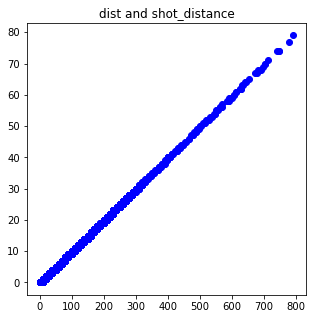

In [437]:
plt.figure(figsize=(5,5))
plt.scatter(raw.dist,raw.shot_distance,color='blue')
plt.title("dist and shot_distance")

In [438]:
raw.dist[:5]

0    181.859836
1    157.000000
2    168.600119
3    222.865430
4      0.000000
Name: dist, dtype: float64

In [439]:
raw.shot_distance[:5]

0    18
1    15
2    16
3    22
4     0
Name: shot_distance, dtype: int64

In [440]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [441]:
gs=kobe.groupby("shot_zone_area")

In [442]:
len(gs)

6

In [443]:
import matplotlib.cm as cm
plt.figure(figsize=(30,20))

In [444]:
def scatter_plot_by_category(feat):
    alpha=0.02
    gs=kobe.groupby(feat)
    cs=cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color=c,alpha=alpha)

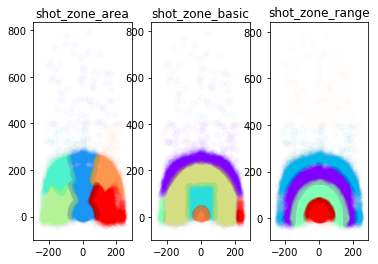

In [445]:
#shot_zone_area 
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')
# shot_zone_basic 
plt.subplot(132)
scatter_plot_by_category("shot_zone_basic")
plt.title("shot_zone_basic")
# shot_zone_range
plt.subplot(133)
scatter_plot_by_category("shot_zone_range")
plt.title("shot_zone_range")

In [446]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [447]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic', \
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']

In [448]:
drops=[]
for drop in drops:
    raw=raw.drop[drop]

In [449]:
raw.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'dist', 'angle', 'remaining_time'],
      dtype='object')

In [450]:
print(raw['combined_shot_type'].value_counts())

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64


In [451]:
pd.get_dummies(raw['combined_shot_type'],prefix='combined_shot_type')[0:2]

,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,0,0,0,1,0,0
1,0,0,0,1,0,0


In [452]:
test1=pd.get_dummies(raw['combined_shot_type'],prefix='combined_shot_type')

In [453]:
categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']
for var in categorical_vars:
    raw=pd.concat([raw,pd.get_dummies(raw[var],prefix=var)],1)
    raw=raw.drop(var,1)

In [454]:
train_kobe=raw[pd.notnull(raw['shot_made_flag'])]

In [455]:
test_kobe=raw[pd.isnull(raw['shot_made_flag'])]

In [456]:
train_kobe=train_kobe.drop('shot_made_flag',1)

In [457]:

test_kobe=raw[pd.isnull(raw['shot_made_flag'])]
test_kobe=test_kobe.drop('shot_made_flag',1)


In [458]:
test_kobe.shape

(5000, 146)

In [459]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,log_loss
import time

In [468]:
print("Finding bset n_estimators for RandomForestClassifier...")
min_score=100000
best_n=0
score_n=[]
range_n=np.logspace(0,2,num=3).astype(int)
for n in range_n:
    print("the number of trees:{0}".format(n))
    tl=time.time()
    
    rfc_score=0
    rfc=RandomForestClassifier(n_estimators=n)
    for train_k,test_k in KFold(len(train_kobe),n_folds=10,shuffle=True):
        print(train_k)
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        pred=rfc.predict(train_kobe.iloc[test_k])
        rfc_score+=log_loss(train_label.iloc[test_k],pred)/10 
    score_n.append(rfc_score)
    if rfc_score<min_score:
        min_score=rfc_score
        best_n=n
    
    t2=time.time()
    print("Done processing {0} trees ({1:.3f} sec)".format(n,t2-t2))
print(best_n,min_score)


    

Finding bset n_estimators for RandomForestClassifier...
the number of trees:1
[    0     1     2 ..., 25693 25694 25695]


IndexingError: Too many indexers

In [466]:
train_kobe.iloc[train_k]

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,playoffs,seconds_remaining,shot_distance,...,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_97,season_98,season_99
1,12,20000012,34.0443,-157,0,-118.4268,10,0,22,15,...,0,0,0,0,0,0,0,0,0,0
2,35,20000012,33.9093,-101,135,-118.3708,7,0,45,16,...,0,0,0,0,0,0,0,0,0,0
3,43,20000012,33.8693,138,175,-118.1318,6,0,52,22,...,0,0,0,0,0,0,0,0,0,0
4,155,20000012,34.0443,0,0,-118.2698,6,0,19,0,...,0,0,0,0,0,0,0,0,0,0
5,244,20000012,34.0553,-145,-11,-118.4148,9,0,32,14,...,0,0,0,0,0,0,0,0,0,0
6,251,20000012,34.0443,0,0,-118.2698,8,0,52,0,...,0,0,0,0,0,0,0,0,0,0
8,265,20000012,33.9363,-65,108,-118.3348,6,0,12,12,...,0,0,0,0,0,0,0,0,0,0
9,294,20000012,33.9193,-33,125,-118.3028,3,0,36,12,...,0,0,0,0,0,0,0,0,0,0
10,309,20000012,33.8063,-94,238,-118.3638,1,0,56,25,...,0,0,0,0,0,0,0,0,0,0
11,4,20000019,33.9173,121,127,-118.1488,11,0,0,17,...,0,0,0,0,0,0,0,0,0,0


In [461]:
train_label.iloc[train_k][:5]

1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
Name: shot_made_flag, dtype: float64

In [ ]:
for col in train_kobe.columns:
    print(col,train_kobe[col].sum())

In [ ]:
train_kobe['shot_zone_area']